In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
# Checking for missing values
print("Missing values:")
print(df.isnull().sum().sum())  # No missing values



Missing values:
0


In [12]:
# Splitting data into train and test sets
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Preprocessing Steps ==> Checking for missing values is essential to ensure data quality, prevent errors in analysis, and apply appropriate handling techniques for accurate results.

==> When splitting data into training and testing sets, the goal is to divide the data in a way that allows the model to train on one portion of the data (the training set) and be evaluated on another portion (the test set), which helps ensure that the model generalizes well to new, unseen data.

==> The purpose of feature scaling is to standardize the range of independent variables or features so that no variable dominates others due to differing scales.

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Logistic Regression is a classification algorithm used to predict the probability of a categorical dependent variable.
Here logistic Regression is used for prediction. 

In [38]:
# Create and train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Decision Tree Classifier is a supervised learning algorithm that splits data into different branches based on feature values.


In [40]:
# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

 Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.
 It randomly selects subsets of the dataset to train multiple decision trees.
 Each tree is trained using a random subset of features to increase diversity.
 Each tree makes a prediction, and the final output is determined by majority vote (classification) or averaging (regression).

In [43]:
# Create and train SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification tasks.


In [45]:
# Create and train k-NN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

 k-Nearest Neighbors (k-NN) algorithm is a simple, yet powerful, classification method used in medical diagnosis.
 

In [49]:
# Training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]
--------------------------------------------------
Decision Tree Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
 [[39  4]
 [ 3 68]]
--------------------------------------------------
Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0  

C:\Users\ASWATHY\AppData\Local\Temp\ipykernel_19936\3979506999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


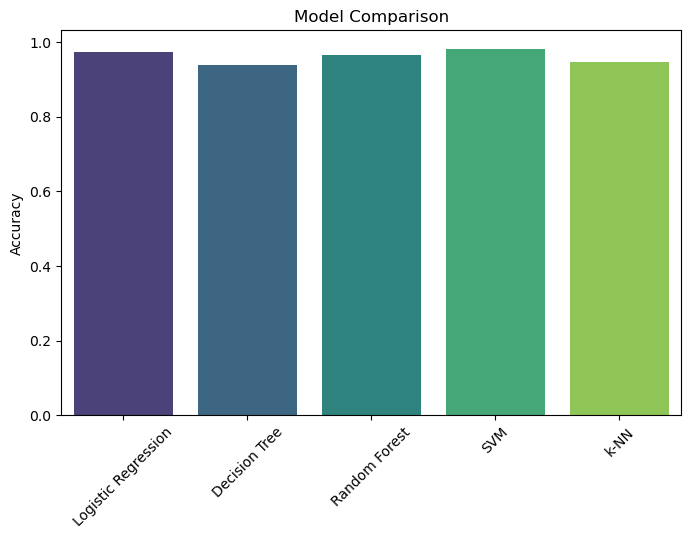

In [51]:
# Comparing performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Best and worst models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f"Best Performing Model: {best_model} ({results[best_model]:.4f} accuracy)")
print(f"Worst Performing Model: {worst_model} ({results[worst_model]:.4f} accuracy)")


Best Performing Model: SVM (0.9825 accuracy)
Worst Performing Model: Decision Tree (0.9386 accuracy)
